
## 지도학습 : 회귀 ex

> 교안2-20지도학습소개.pdf


### 주요 지도학습 알고리즘과 분류 및 회귀 문제 여부

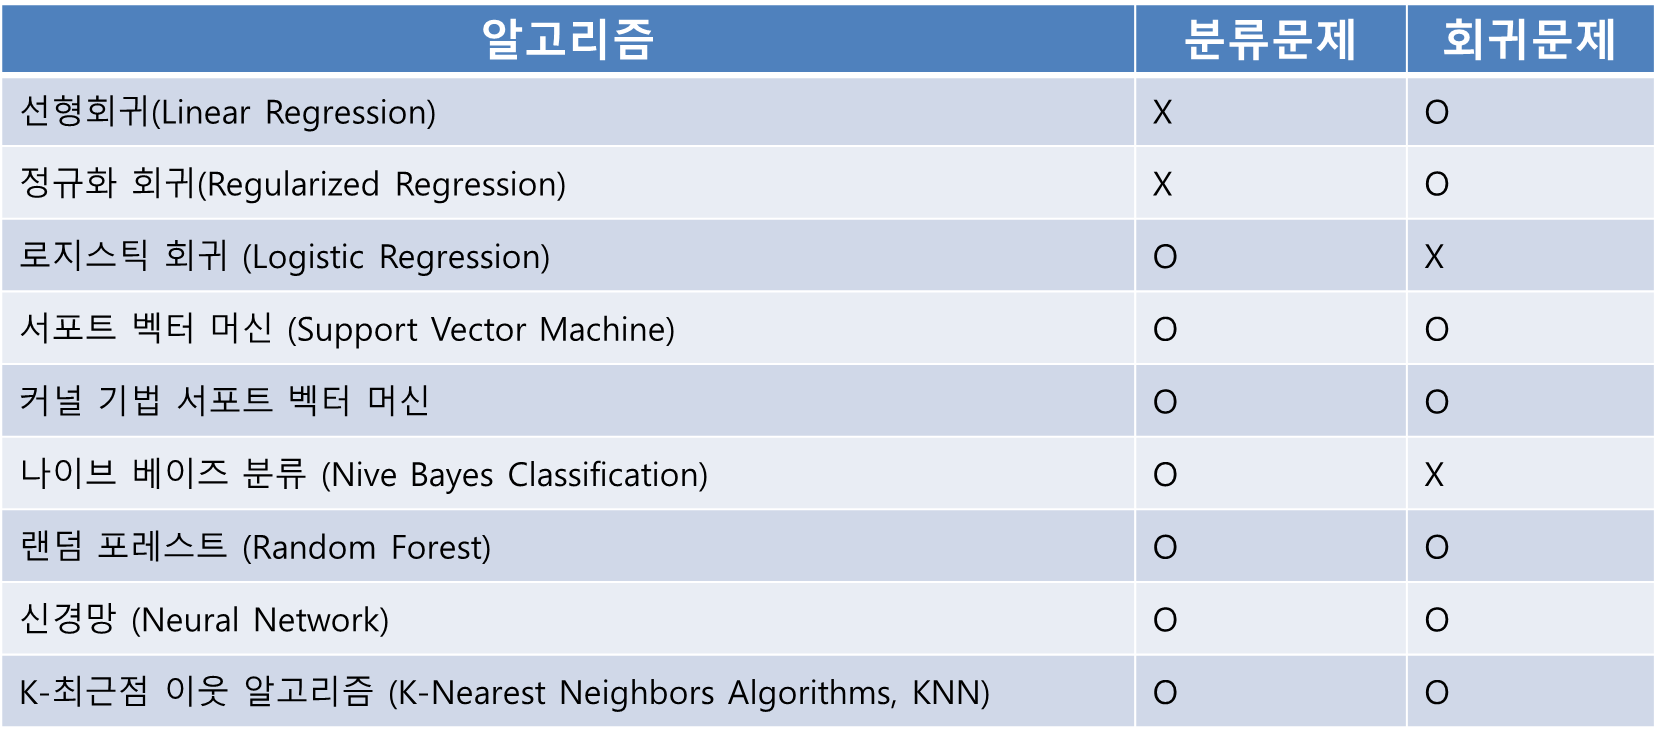

# Scikilearn 으로 보스턴 주택가격 데이터 회귀분석

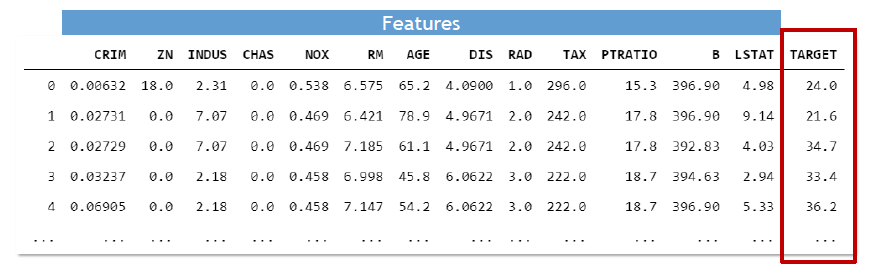

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

plt.rc('font', family=fontname)  #  'NanumGothic'
# plt.rcParams["font.family"] = fontname

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

In [ ]:
from sklearn.linear_model import LinearRegression


scikit 1.2 부터 load_boston() 중단으로 

In [ ]:
# scikit 1.2 부터 load_boaston() 지원이 중단된다.
# from sklearn.datasets import load_boston
# boston = load_boston()

# boston.feature_names

# boston_df = pd.DataFrame(boston['data'], # 학습 데이터
#                         columns=boston['feature_names'])


In [ ]:
# bostong housing price 원본 데이터
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

데이터 피처의 속성의미는:

- CRIM: 지역별 범죄 발생률
- ZN: 25000평방미터를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS:찰스강에 대한 더미 변수 (강의 경계에 위치한 경우 1, 아니면 0)
- NOX: 일산화질수 농도
- RM: 거주할 수 있는 방의 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도록 접근 용이성
- TAX: 10000달러 당 재산세 비율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 주택 가격

In [ ]:
# 데이터를 살펴봅시다
import pandas as pd
boston_df = pd.DataFrame(data, # 학습 데이터
                        columns=feature_names)
boston_df['TARGET'] = target
boston_df

## 1. 단일특성 선형회귀 모델 작성과 학습

In [ ]:
# RM 변수와 target과의 관계를 시각화
X_rooms = data[:, 5] # 학습 데이터의 전체 행, 5번 열

# 산점도 그리기
plt.scatter(X_rooms, target)
plt.xlabel("No of rooms")
plt.ylabel("Price/1000 ($)")
plt.show()

In [ ]:
# 선형 회귀 모델의 생성
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()

In [ ]:
# 학습 진행
lr_clf.fit(X_rooms.reshape(-1, 1), target) 

In [ ]:
# 최종 목적은 회귀 선을 위한 가중치와 절편을 구하는 것
print("모델의 가중치:", lr_clf.coef_)
print("모델의 절편:", lr_clf.intercept_)

In [ ]:
# 실제 학습 데이터와 회귀선

pred_space = np.linspace( min(X_rooms), max(X_rooms)).reshape(-1, 1)
preds = lr_clf.predict(pred_space)

# 산점도를 그려 봅니다.
plt.scatter(X_rooms, # x축
            target) # y축
# 회귀선 
plt.plot(pred_space, # X축
        preds,
         color="red"
        ) # 우리 모델의 예측값
plt.show()

## 2. 모든 특성 선형회귀 모델 작성과 학습

boston 데이터 셋 모든 특성을 이용한 예측

- 학습 데이터, 테스트 데이터 분할


In [ ]:
# boston 데이터 셋 모든 특성을 이용한 예측
# 학습 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('TARGET', axis=1).values, 
    boston_df['TARGET'].values,  
    test_size=0.3,
    random_state=42
)

In [ ]:
# 학습 진행
reg_all = LinearRegression()
reg_all.fit(X_train, y_train) # 학습 데이터와 학습 라벨

In [ ]:
# 가중치와 절편
print("가중치:", reg_all.coef_)
print("절편:", reg_all.intercept_)

In [ ]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(reg_all.score(X_train, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(reg_all.score(X_test, y_test))) # 테스트 데이터

In [ ]:
# 보스턴 데이터 셋의 첫번째 데이터와 타겟
print("데이터 셋 관측치:", data[1])
print("데이터 셋 label:", target[1])

In [ ]:
# 모델이 예측한 예측치
reg_all.predict(data[1].reshape(1, 13))

## 3. KNN Regressor 이용 회귀

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('TARGET', axis=1).values, 
    boston_df['TARGET'].values,  
    test_size=0.3,
    random_state=42
)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor()

In [ ]:
knnreg.fit(X_train, y_train)

In [ ]:
# X_test(테스트 데이터 셋)으로 예측
y_pred = knnreg.predict(X_test)
print("테스트 세트(예측값):", y_pred)
print("테스트 세트  (정답):", y_test)

In [ ]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(knnreg.score(X_train, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(knnreg.score(X_test, y_test))) # 테스트 데이터

## 4. SVM Regressor 이용 회귀분석

 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
from sklearn.svm import SVR

svmreg = SVR()
svmreg.fit(X_train, y_train)

In [ ]:
# X_test(테스트 데이터 셋)으로 예측
y_pred = svmreg.predict(X_test)
print("테스트 세트(예측값):", y_pred)
print("테스트 세트  (정답):", y_test)

In [ ]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(svmreg.score(X_train, y_train))) 
print("테스트 세트 점수: {:.2f}".format(svmreg.score(X_test, y_test)))

# 스케일러 적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [ ]:
scaler = MinMaxScaler()
# scaler = RobustScaler()
# scaler = StandardScaler()
# scaler = Normalizer()

scaler.fit(X_train) # target 은 지정하지 않음
X_train_scaled = scaler.transform(X_train) # 변환
X_test_scaled = scaler.transform(X_test) # 변환

## 선형회귀

In [ ]:
# 학습 진행
reg_all = LinearRegression()
reg_all.fit(X_train_scaled, y_train) # 학습 데이터와 학습 라벨

In [ ]:
# 가중치와 절편
print("가중치:", reg_all.coef_)
print("절편:", reg_all.intercept_)

In [ ]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(reg_all.score(X_train_scaled, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(reg_all.score(X_test_scaled, y_test))) # 테스트 데이터

## KNN Regressor 이용 회귀

In [ ]:
knnreg = KNeighborsRegressor()

In [ ]:
knnreg.fit(X_train_scaled, y_train)

In [ ]:
# X_test(테스트 데이터 셋)으로 예측
y_pred = knnreg.predict(X_test_scaled)
print("테스트 세트(예측값):", y_pred)
print("테스트 세트  (정답):", y_test)

In [ ]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(knnreg.score(X_train_scaled, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(knnreg.score(X_test_scaled, y_test))) # 테스트 데이터

## SVM 이용 회귀분석

 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
from sklearn.svm import SVR

svmreg = SVR()
svmreg.fit(X_train_scaled, y_train)

In [ ]:
# X_test(테스트 데이터 셋)으로 예측
y_pred = svmreg.predict(X_test_scaled)
print("테스트 세트(예측값):", y_pred)
print("테스트 세트  (정답):", y_test)

In [ ]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(svmreg.score(X_train_scaled, y_train))) 
print("테스트 세트 점수: {:.2f}".format(svmreg.score(X_test_scaled, y_test)))